In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
#第一筆資料
data1 = pd.read_csv('population.csv', header=None)
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
1,"Population, total",SP.POP.TOTL,Japan,JPN,126843000,127149000,127445000,127718000,127761000,127773000,127854000,128001000,128063000,128047000,128070000,127833000,127629000,127445000,127276000,127141000
2,"Population, total",SP.POP.TOTL,"Korea, Rep.",KOR,47008111,47370164,47644736,47892330,48082519,48184561,48438292,48683638,49054708,49307835,49554112,49936638,50199853,50428893,50746659,51014947
3,"Population, total",SP.POP.TOTL,Singapore,SGP,4027887,4138012,4175950,4114826,4166664,4265762,4401365,4588599,4839396,4987573,5076732,5183688,5312437,5399162,5469724,5535002
4,Population growth (annual %),SP.POP.GROW,Japan,JPN,0.167275578113187,0.240952587521069,0.232527187105684,0.213980948779682,0.0336622582725446,0.00939209655766336,0.0633735894181335,0.114908847726211,0.0484253945978966,-0.0124946312294096,0.0179605415195644,-0.185226486410846,-0.159710675844347,-0.144271883387076,-0.132694222147042,-0.106124993746747


In [2]:
data1.columns = ['Series Name','Series Code','Country Name','Country Code','2000','2001','2002','2003','2004',
                '2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

In [ ]:
#人口數與人口成長率有沒有直接關係?

In [3]:
#取得人口數
population1 = data1.iloc[1:4]
population1

,Series Name,Series Code,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,"Population, total",SP.POP.TOTL,Japan,JPN,126843000,127149000,127445000,127718000,127761000,127773000,127854000,128001000,128063000,128047000,128070000,127833000,127629000,127445000,127276000,127141000
2,"Population, total",SP.POP.TOTL,"Korea, Rep.",KOR,47008111,47370164,47644736,47892330,48082519,48184561,48438292,48683638,49054708,49307835,49554112,49936638,50199853,50428893,50746659,51014947
3,"Population, total",SP.POP.TOTL,Singapore,SGP,4027887,4138012,4175950,4114826,4166664,4265762,4401365,4588599,4839396,4987573,5076732,5183688,5312437,5399162,5469724,5535002


In [4]:
#人口數與都市發展有著密切關係，也會影響平均國民所得及分配資源

Country = ['JAPAN', 'KOREA', 'SINGAPORE']
years = np.linspace(2000, 2015, 16)
#日本
Pd_country1 = population1.loc[1]
#韓國
Pd_country2 = population1.loc[2]
#新加坡
Pd_country3 = population1.loc[3]

alldata = {
    "JAPAN": Pd_country1,
    "KOREA" : Pd_country2,
    "SINGAPORE": Pd_country3,
}

df = pd.DataFrame(alldata)
df = df.iloc[4:]
df

,JAPAN,KOREA,SINGAPORE
2000,126843000,47008111,4027887
2001,127149000,47370164,4138012
2002,127445000,47644736,4175950
2003,127718000,47892330,4114826
2004,127761000,48082519,4166664
2005,127773000,48184561,4265762
2006,127854000,48438292,4401365
2007,128001000,48683638,4588599
2008,128063000,49054708,4839396
2009,128047000,49307835,4987573


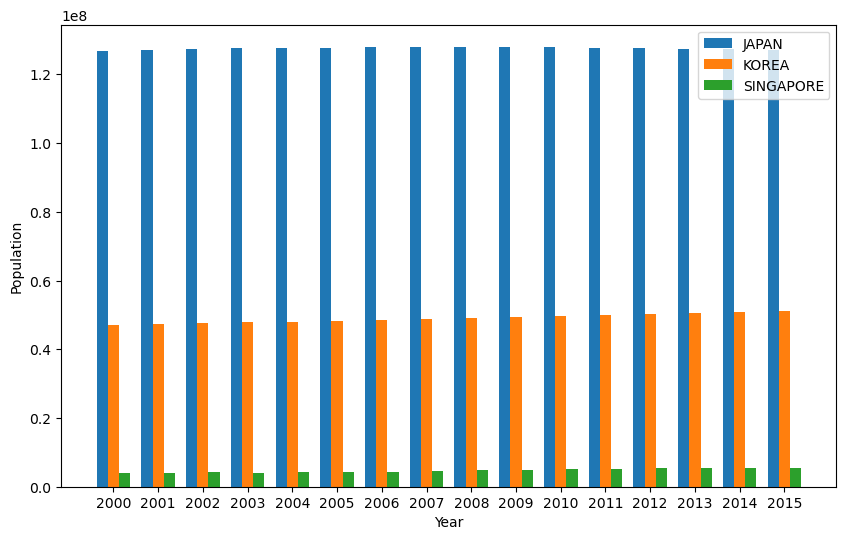

In [26]:
import matplotlib.pyplot as plt


# 將 'JAPAN' 列的數據轉換為浮點數
df['JAPAN'] = df['JAPAN'].astype(float)
# 將 'KOREA' 列的數據轉換為浮點數
df['KOREA'] = df['KOREA'].astype(float)
# 將 'SINGAPORE' 列的數據轉換為浮點數
df['SINGAPORE'] = df['SINGAPORE'].astype(float)

# 設定長條圖的寬度
bar_width = 0.25

# 為每個國家的數據設定不同的 x 軸位置
r1 = np.arange(len(df.index))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# 繪製長條圖
plt.figure(figsize=(10, 6))

# 繪製日本的人口數據
plt.bar(r1, df['JAPAN'], width=bar_width, label='JAPAN')

# 繪製韓國的人口數據
plt.bar(r2, df['KOREA'], width=bar_width, label='KOREA')

# 繪製新加坡的人口數據
plt.bar(r3, df['SINGAPORE'], width=bar_width, label='SINGAPORE')

# 添加圖例
plt.legend()

# 設定 x 軸和 y 軸的標籤
plt.xlabel('Year')
plt.ylabel('Population')

# 設定 x 軸的刻度位置和標籤
plt.xticks([r + bar_width for r in range(len(df.index))], df.index)

# 顯示圖表
plt.show()

In [6]:
#人口成長率
population_growth = data1.iloc[4:7]
population_growth

,Series Name,Series Code,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4,Population growth (annual %),SP.POP.GROW,Japan,JPN,0.167275578113187,0.240952587521069,0.232527187105684,0.213980948779682,0.0336622582725446,0.00939209655766336,0.0633735894181335,0.114908847726211,0.0484253945978966,-0.0124946312294096,0.0179605415195644,-0.185226486410846,-0.159710675844347,-0.144271883387076,-0.132694222147042,-0.106124993746747
5,Population growth (annual %),SP.POP.GROW,"Korea, Rep.",KOR,0.836180864297766,0.767241774760276,0.577957276814842,0.518321452985646,0.396331436697806,0.211997784117548,0.525199940498775,0.505234032920336,0.759316681850927,0.514682827535803,0.49822508440111,0.768971758582589,0.525713660600414,0.455218622164662,0.628149861433639,0.527288497407793
6,Population growth (annual %),SP.POP.GROW,Singapore,SGP,1.73204223254257,2.69735584326358,0.912639805776796,-1.47453284191939,1.2519166730553,2.35051128857175,3.1293891560754,4.16600286360933,5.32151708302623,3.0159499147579,1.77183287926401,2.08490245606007,2.45339033031018,1.61930809858875,1.29844017799226,1.18637693749822


In [44]:
#人口成長率可以影響國家未來的發展

Country = ['JAPAN', 'KOREA', 'SINGAPORE']
years = np.linspace(2000, 2015, 16)
#日本
Pd_country1 = population_growth.loc[4]
#韓國
Pd_country2 = population_growth.loc[5]
#新加坡
Pd_country3 = population_growth.loc[6]

alldata = {
    "JAPAN": Pd_country1,
    "KOREA" : Pd_country2,
    "SINGAPORE": Pd_country3,
}

df2 = pd.DataFrame(alldata)
df2 = df2.iloc[4:]
df2

,JAPAN,KOREA,SINGAPORE
2000,0.167275578113187,0.836180864297766,1.73204223254257
2001,0.240952587521069,0.767241774760276,2.69735584326358
2002,0.232527187105684,0.577957276814842,0.912639805776796
2003,0.213980948779682,0.518321452985646,-1.47453284191939
2004,0.0336622582725446,0.396331436697806,1.2519166730553
2005,0.00939209655766336,0.211997784117548,2.35051128857175
2006,0.0633735894181335,0.525199940498775,3.1293891560754
2007,0.114908847726211,0.505234032920336,4.16600286360933
2008,0.0484253945978966,0.759316681850927,5.32151708302623
2009,-0.0124946312294096,0.514682827535803,3.0159499147579


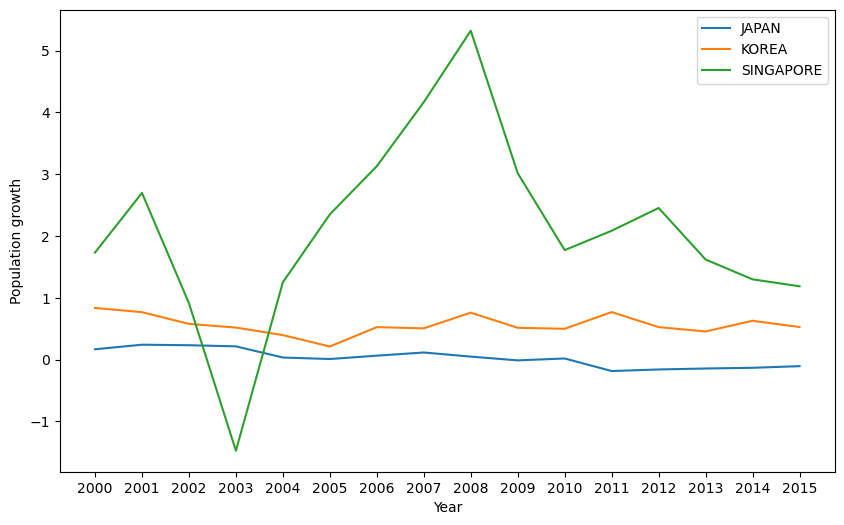

In [24]:
#繪製人口成長率折線圖
plt.figure(figsize=(10, 6))
# 將 'JAPAN' 列的數據轉換為浮點數
df2['JAPAN'] = df2['JAPAN'].astype(float)
# 將 'KOREA' 列的數據轉換為浮點數
df2['KOREA'] = df2['KOREA'].astype(float)
# 將 'SINGAPORE' 列的數據轉換為浮點數
df2['SINGAPORE'] = df2['SINGAPORE'].astype(float)

# 繪製日本的人口數據
plt.plot(df2.index, df2['JAPAN'], label='JAPAN')

# 繪製韓國的人口數據
plt.plot(df2.index, df2['KOREA'], label='KOREA')

# 繪製新加坡的人口數據
plt.plot(df2.index, df2['SINGAPORE'], label='SINGAPORE')

# 添加圖例
plt.legend()

# 設定 x 軸和 y 軸的標籤
plt.xlabel('Year')
plt.ylabel('Population growth')

# 顯示圖表
plt.show()

In [ ]:
#可以看見人數最多的日本，人口成長率反而最低。
#新加坡的人口成長起伏是這三個國家最大的，有其他外在因素

In [28]:
#第二筆資料
data2 = pd.read_csv('relate.csv', header=None)
data2.head()

,0,1,2,3,4,5,6,7,8,9
0,Country Name,Country Code,Series Name,Series Code,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
1,Japan,JPN,Age dependency ratio (% of working-age populat...,SP.POP.DPND,57.3887430327135,59.0152801637455,60.7133638032773,62.3833231883095,63.9521257887958,65.290106306176
2,Japan,JPN,Consumer price index (2010 = 100),FP.CPI.TOTL,99.7323663990331,99.680566347233,100.0259000259,102.788569455236,103.600103600104,103.47923681257
3,Japan,JPN,"Total employment, total (ages 15+)",SL.EMP.TOTL,62969428,62794462,63334058,63813725,64152974,64752352
4,"Korea, Rep.",KOR,Age dependency ratio (% of working-age populat...,SP.POP.DPND,36.481759149123,36.3589055204387,36.3228990728866,36.4410282679253,36.7429178205437,37.1496082598761


In [29]:
data2.columns = ['Series Name','Series Code','Country Name','Country Code','2011','2012','2013','2014','2015','2016']

In [30]:
Age_dependency_ratio = data2.iloc[[1, 4, 7]]
#扶養比
Age_dependency_ratio

,Series Name,Series Code,Country Name,Country Code,2011,2012,2013,2014,2015,2016
1,Japan,JPN,Age dependency ratio (% of working-age populat...,SP.POP.DPND,57.3887430327135,59.0152801637455,60.7133638032773,62.3833231883095,63.9521257887958,65.290106306176
4,"Korea, Rep.",KOR,Age dependency ratio (% of working-age populat...,SP.POP.DPND,36.481759149123,36.3589055204387,36.3228990728866,36.4410282679253,36.7429178205437,37.1496082598761
7,Singapore,SGP,Age dependency ratio (% of working-age populat...,SP.POP.DPND,35.8092770864642,36.0043849622012,36.3473387177015,36.7979217671482,37.3419885620364,37.9844314563033


In [31]:
#消費指數
Consumer_price_index =data2.iloc[[2, 5, 8]]
Consumer_price_index

,Series Name,Series Code,Country Name,Country Code,2011,2012,2013,2014,2015,2016
2,Japan,JPN,Consumer price index (2010 = 100),FP.CPI.TOTL,99.7323663990331,99.680566347233,100.0259000259,102.788569455236,103.600103600104,103.47923681257
5,"Korea, Rep.",KOR,Consumer price index (2010 = 100),FP.CPI.TOTL,104.025846249594,106.301121621065,107.684500029745,109.057170183459,109.827340829112,110.894505383873
8,Singapore,SGP,Consumer price index (2010 = 100),FP.CPI.TOTL,105.247910208201,110.064012324365,112.659983380321,113.814728526275,113.21975920438,112.617106126894


In [ ]:
#扶養比高的地方，消費指數也高嗎?

In [56]:
#扶養比/消費指數
Country = ['Age_dependency_JAPAN', 'Consumer_price_JAPAN','Age_dependency_KOREA', 'Consumer_price_KOREA','Age_dependency_SINGAPORE','Consumer_price_SINGAPORE']
years = np.linspace(2011, 2015, 5)
#日本
Pd_country1 = data2.loc[1]
Pd_country2 = data2.loc[2]
#韓國
Pd_country3 = data2.loc[4]
Pd_country4 = data2.loc[5]
#新加坡
Pd_country5 = data2.loc[7]
Pd_country6 = data2.loc[8]

alldata = {
    "Age_dependency_JAPAN": Pd_country1,
    "Consumer_price_JAPAN": Pd_country2,
    "Age_dependency_KOREA" : Pd_country3,
    "Consumer_price_KOREA" : Pd_country4,
    "Age_dependency_SINGAPORE": Pd_country5,
    "Consumer_price_SINGAPORE": Pd_country6,
}

df3 = pd.DataFrame(alldata)
df3 = df3.iloc[5:]
df3

,Age_dependency_JAPAN,Consumer_price_JAPAN,Age_dependency_KOREA,Consumer_price_KOREA,Age_dependency_SINGAPORE,Consumer_price_SINGAPORE
2012,59.0152801637455,99.680566347233,36.3589055204387,106.301121621065,36.0043849622012,110.064012324365
2013,60.7133638032773,100.0259000259,36.3228990728866,107.684500029745,36.3473387177015,112.659983380321
2014,62.3833231883095,102.788569455236,36.4410282679253,109.057170183459,36.7979217671482,113.814728526275
2015,63.9521257887958,103.600103600104,36.7429178205437,109.827340829112,37.3419885620364,113.21975920438
2016,65.290106306176,103.47923681257,37.1496082598761,110.894505383873,37.9844314563033,112.617106126894


In [34]:
#總勞動人口
Total_employment =data2.iloc[[3, 6, 9]]
Total_employment

,Series Name,Series Code,Country Name,Country Code,2011,2012,2013,2014,2015,2016
3,Japan,JPN,"Total employment, total (ages 15+)",SL.EMP.TOTL,62969428,62794462,63334058,63813725,64152974,64752352
6,"Korea, Rep.",KOR,"Total employment, total (ages 15+)",SL.EMP.TOTL,24785678,25215504,25558106,26151652,26437243,26690966
9,Singapore,SGP,"Total employment, total (ages 15+)",SL.EMP.TOTL,2801195,2908712,2969817,3052031,3167910,3204829


In [48]:
#勞動人口
Country = ['JAPAN', 'KOREA', 'SINGAPORE']
years = np.linspace(2011, 2015, 5)
#日本
Pd_country1 = Total_employment.loc[3]
#韓國
Pd_country2 = Total_employment.loc[6]
#新加坡
Pd_country3 = Total_employment.loc[9]

alldata = {
    "JAPAN": Pd_country1,
    "KOREA" : Pd_country2,
    "SINGAPORE": Pd_country3,
}

df4 = pd.DataFrame(alldata)
df4 = df4.iloc[4:]
df4

,JAPAN,KOREA,SINGAPORE
2011,62969428,24785678,2801195
2012,62794462,25215504,2908712
2013,63334058,25558106,2969817
2014,63813725,26151652,3052031
2015,64152974,26437243,3167910
2016,64752352,26690966,3204829


In [52]:
#勞動人口占總人口比例
#日本
# 將 'JAPAN' 列的數據轉換為浮點數
df4['JAPAN'] = df4['JAPAN'].astype(float)
df5 = df.iloc[11:]
#畫一個新的表格
name = ['population', 'employment']
years = np.linspace(2011, 2015, 5)
#日本
Pd_name1 = df5['JAPAN']
Pd_name2 = df4['JAPAN']

alldata = {
    "population": Pd_name1,
    "employment" : Pd_name2,
}

df6 = pd.DataFrame(alldata)
df6

,population,employment
2011,127833000.0,62969428.0
2012,127629000.0,62794462.0
2013,127445000.0,63334058.0
2014,127276000.0,63813725.0
2015,127141000.0,64152974.0
2016,NaN,64752352.0


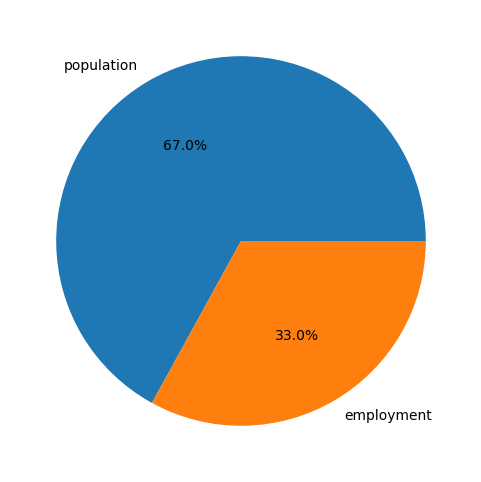

In [54]:
# 繪製圓餅圖
plt.figure(figsize=(6, 6))
value1 = df6.loc['2011', 'population']
value2 = df6.loc['2011', 'employment']
# 繪製圓餅圖
#2011為例
plt.pie([value1, value2], labels=['population', 'employment'], autopct='%1.1f%%')

# 顯示圖表
plt.show()

In [ ]:
#總人口多的話總勞動人口的也多嗎?